In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import seaborn as sn

from fastai.tabular.all import *
from fastai.metrics import * 
from fastai.callback.hook import *




#path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
path = Path('/home/jupyter/fraud-detection-pytorch-scikit-fastai/data')

Path.BASE_PATH = path
pd.options.display.max_rows = 500
pd.options.display.max_columns = 300

# Data pre-processing

In [258]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [259]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
562834,3549834,0,14919126,57.95,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,0.0,NaN,comcast.net,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,NaN,NaN,81.0,31.0,NaN,NaN,NaN,NaN,81.0,81.0,NaN,NaN,NaN,81.0,T,T,T,NaN,NaN,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80660,3067660,0,1731739,150.00,R,2114,396.0,150.0,mastercard,224.0,debit,315.0,87.0,NaN,NaN,yahoo.com,sbcglobal.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,115.041664,0.041666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,75759.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-360.0,Found,Found,166.0,NaN,312.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,ie 11.0 for desktop,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0
347704,3334704,0,8559796,47.95,W,10112,360.0,150.0,visa,166.0,debit,264.0,87.0,2.0,NaN,NaN,NaN,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196807,3183807,0,4427895,39.00,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565353,3552353,0,14995132,280.00,W,16873,343.0,150.0,visa,226.0,credit,512.0,87.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,135.0,135.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,136.0,T,T,T,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
train_ss.shape

(59054, 95)

In [261]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [262]:
# I had to do this so that the learner would automatically use FlattenedLoss of 
# CrossEntropyLoss() as the loss function. Leaving the dep_var as an int causes 
# FlattenedLoss of MSELoss() to be chosen.
train_ss['isFraud'] = train_ss['isFraud'].astype('category')

In [263]:
train_ss['isFraud']

562834    0
80660     0
347704    0
196807    0
565353    0
         ..
331087    0
130888    0
170061    0
262042    0
509283    0
Name: isFraud, Length: 59054, dtype: category
Categories (2, int64): [0, 1]

In [264]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [265]:
train_ss[cat].nunique()

ProductCD           5
card1            6146
card2             500
card3              68
card4               4
card5              82
card6               4
addr1             143
addr2              33
P_emaildomain      59
R_emaildomain      58
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        762
id_12               2
id_13              37
id_14              19
id_15               3
id_16               2
id_17              61
id_18              11
id_19             351
id_20             201
id_21             117
id_22               9
id_23               3
id_24               7
id_25             104
id_26              51
id_27               2
id_28               2
id_29               2
id_30              71
id_31             104
id_32               3
id_33             116
id_34               3
id_35     

There are a few of categorical variables (ex: card1) where the number of categories has high cardinality, so deep learning might help us in this senerio.

In [266]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12666124

In [267]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [268]:
len(valid_idx)

10563

In [269]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_ss, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [271]:
(path/'to_nn.pkl').save(to_nn)

# Function definitions

In [3]:
def plot_confusion_matrix(interp):
    cm = interp.confusion_matrix()
    labels = ['legit', 'Fraud']
    fig = plt.figure()
    df_cm = pd.DataFrame(cm, range(len(cm)), range(len(cm)))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.0f') # font size
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    return fig

# NN without V*** features

In [4]:
#to_nn = (path/'to_nn.pkl').load()

In [5]:
with open (path/'to_nn.pkl', 'rb') as f:
    to_nn = pickle.load(f)

In [6]:
to_nn.items

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
80660,-1.149491,0,-1.126594,0.068744,3,362,295,30,3,71,3,71,27,-0.185432,-0.084357,54,43,-0.095027,-0.089979,-0.034183,-0.047698,-0.212887,-0.109543,-0.051393,-0.047708,-0.264766,-0.048674,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.491509,-0.245165,-0.146367,-0.097679,0.670303,-5.136874,-0.544472,-0.376135,-0.131715,-0.078849,-0.1213,-0.503489,0,0,0,0,0,0,0,0,0,0.164293,-0.794794,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108966,2,28,5,1,1,31,0,123,79,0,0,0,0,0,0,0,1,1,41,75,2,62,3,2,1,2,2,1,666,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,2,2,1,1,1
347704,0.752115,0,0.727788,-0.373009,5,2965,259,30,4,41,3,54,27,-0.214767,-0.084357,0,0,-0.081391,-0.084096,-0.034183,-0.061210,-0.172854,-0.109543,-0.051393,-0.057034,-0.140301,-0.057956,-0.085654,-0.052071,-0.216391,-0.103460,-0.593601,-0.277029,-0.238215,-0.491509,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.586058,-0.589801,-0.131715,-0.078849,-0.1213,-0.731065,2,2,2,0,0,1,1,2,2,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
196807,-0.322414,0,-0.394365,-0.411751,5,1267,389,30,4,73,3,71,27,-0.185432,-0.084357,3,0,-0.095027,-0.089979,-0.034183,-0.061210,-0.212887,-0.109543,-0.051393,-0.057034,-0.202533,-0.057956,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.615762,-0.626640,-0.131715,-0.078849,-0.1213,-0.758157,0,0,0,1,2,1,0,0,0,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
452433,1.497885,0,1.541637,0.068744,3,3914,154,30,4,73,3,75,27,-0.185432,-0.084357,54,19,-0.095027,-0.089979,-0.034183,-0.047698,-0.212887,-0.109543,-0.051393,-0.047708,-0.264766,-0.048674,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,10.041550,0.809087,-0.544472,-0.376135,-0.131715,-0.078849,-0.1213,-0.758157,0,0,0,0,0,0,0,0,0,0.164293,-1.150648,-0.022869,0.031179,0.601226,-11.543178,0.00822,0.014181,-0.028004,0.035332,-4.814421,2,28,6,2,2,31,3,137,153,0,0,0,0,0,0,0,1,1,42,45,2,16,3,2,1,2,1,1,685,2,2,1,2,2,1,2,1,2,1,1,2,2,2,2,2,1,1,1,2,2,1,1,2,2,1,1,1
433846,1.365528,0,1.381473,0.025239,5,3676,259,30,4,41,3,29,27,-0.185432,-0.084357,54,0,-0.081391,-0.084096,-0.034183,-0.061210,-0.172854,-0.083324,-0.051393,-0.057034,-0.140301,-0.057956,-0.085654,-0.052071,-0.201480,-0.103460,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.615762,-0.626640,-0.131715,-0.078849,-0.1213,-0.758157,2,2,2,0,0,1,1,1,2,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [7]:
dls = to_nn.dataloaders(1024)

In [8]:
F1_score = F1Score()
F2_score = FBeta(2)
F5_score = FBeta(5)
F10_score = FBeta(10)
metrics = [BalancedAccuracy(), accuracy, Precision(), Recall(), F1_score, F2_score, F5_score, F10_score, RocAucBinary()]

Let's also use the ActivationStats callback to diagnose the condition of our neural network.

In [19]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.03019951581954956, 0.0014454397605732083)

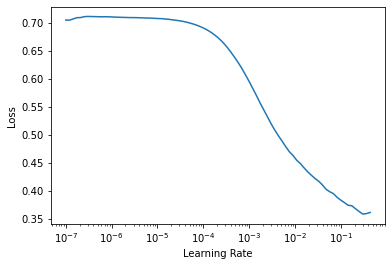

In [20]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [21]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.255382,0.452397,0.506964,0.966487,1.000000,0.013928,0.027473,0.017349,0.014477,0.014065,0.714645,00:04
1,0.144445,0.126838,0.575369,0.963647,0.410072,0.158774,0.228916,0.180952,0.162607,0.159744,0.819159,00:04
2,0.102288,0.132575,0.592495,0.962984,0.406977,0.194986,0.263653,0.217662,0.198972,0.195997,0.799859,00:04
3,0.079724,0.131188,0.587757,0.964215,0.437086,0.183844,0.258824,0.207940,0.188034,0.184905,0.797611,00:04


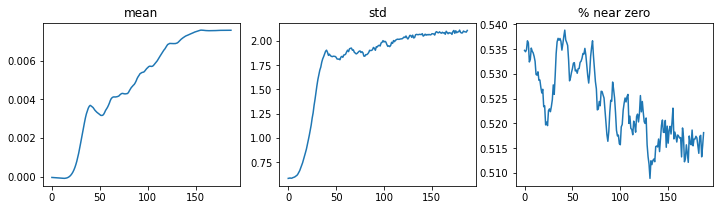

In [22]:
learn.activation_stats.plot_layer_stats(-2)

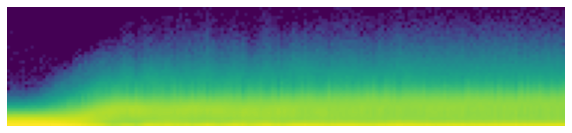

In [23]:
learn.activation_stats.color_dim(-2)

(7.585775847473997e-08, 2.511886486900039e-05)

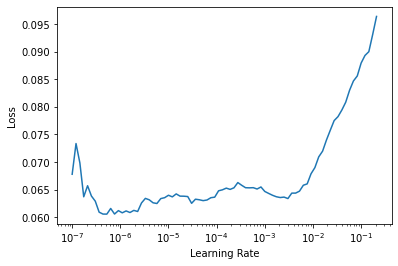

In [24]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

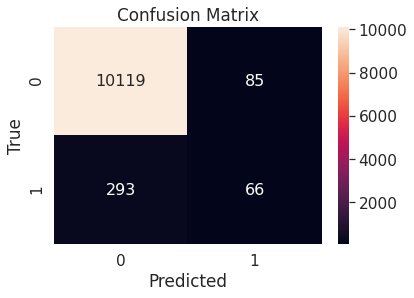

In [27]:
fig = plot_confusion_matrix(interp);
fig.savefig(path.BASE_PATH/'../figures/NN_cm.jpg', dpi=1000, bbox_inches='tight')

# NN with V*** features

In [6]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
train_s['isFraud'] = train_s['isFraud'].astype('category')

In [7]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [8]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [10]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_s['TransactionDT'].min() + 
                    (train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12666124

In [11]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [13]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_s, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [14]:
(path/'to_nn_full.pkl').save(to_nn)

In [15]:
to_nn_full = (path/'to_nn_full.pkl').load()

In [16]:
dls = to_nn.dataloaders(1024)

In [17]:
learn = tabular_learner(dls, layers=[200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.004786301031708717, 0.0014454397605732083)

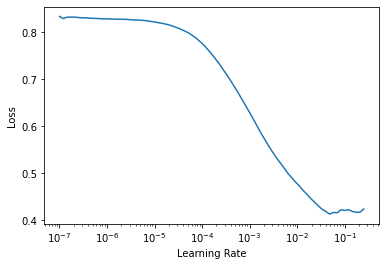

In [18]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [19]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.236715,0.484314,0.597465,0.969990,0.710000,0.197772,0.309368,0.231120,0.203416,0.199194,0.532673,00:17
1,0.131831,0.129693,0.607431,0.968475,0.598485,0.220056,0.321792,0.251913,0.225541,0.221442,0.818919,00:17
2,0.093416,0.120307,0.615395,0.968286,0.582192,0.236769,0.336634,0.268647,0.242298,0.238168,0.814266,00:17
3,0.072158,0.120928,0.619427,0.968286,0.578947,0.245125,0.344423,0.277078,0.250685,0.246533,0.817703,00:17


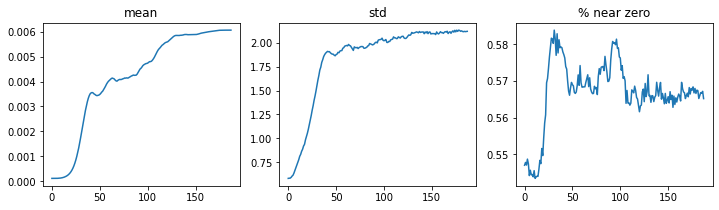

In [20]:
learn.activation_stats.plot_layer_stats(-2)

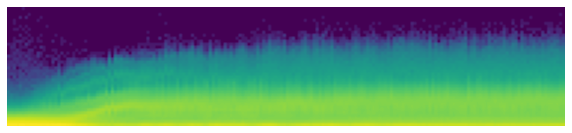

In [21]:
learn.activation_stats.color_dim(-2)

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

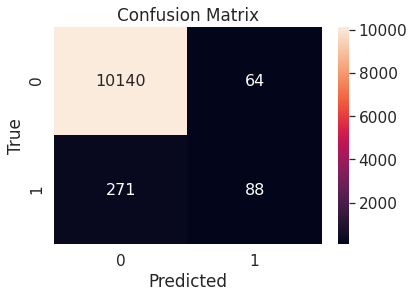

In [23]:
fig = plot_confusion_matrix(interp)

# Imbalance

## RandomUnderSampler without V*** features

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state=42)

In [30]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [31]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12666124

In [32]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [33]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

In [34]:
train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

In [35]:
assert (len(train) + len(valid) == len(train_ss))

In [36]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

In [37]:
train['isFraud'] = train_target

In [38]:
train.shape, train_target.shape

((3274, 95), (3274,))

In [39]:
train.index, valid.index

(RangeIndex(start=0, stop=3274, step=1),
 Int64Index([562834, 565353, 571900, 527518, 510550, 553714, 590346, 538135,
             505692, 551126,
             ...
             497956, 497646, 491953, 543989, 589723, 489447, 515755, 500704,
             570628, 509283],
            dtype='int64', length=10563))

In [40]:
df_nn = pd.concat([train, valid])

In [41]:
df_nn.reset_index(drop=True)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3406705,10620434,20.95,W,10057,225.0,150.0,mastercard,224.0,debit,327.0,87.0,8.0,NaN,yahoo.com,NaN,9.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,0.0,16.0,9.0,43.0,43.0,43.0,256.0,28.0,NaN,NaN,NaN,NaN,123.0,256.0,NaN,NaN,NaN,256.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3102666,2237550,85.00,W,12570,462.0,150.0,visa,226.0,debit,191.0,87.0,194.0,NaN,yahoo.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,16.0,1.0,47.0,47.0,0.0,47.0,0.0,NaN,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,47.0,T,T,T,M0,F,T,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3195156,4810058,117.00,W,8406,264.0,150.0,visa,226.0,debit,420.0,87.0,NaN,NaN,aol.com,NaN,2.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,29.0,2.0,406.0,406.0,6.0,533.0,6.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3275369,7086707,59.00,W,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3127456,2871453,159.95,W,4141,404.0,150.0,mastercard,102.0,credit,264.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,1.0,364.0,364.0,15.0,511.0,15.0,NaN,NaN,NaN,NaN,511.0,NaN,NaN,NaN,NaN,511.0,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13832,3476447,12765034,49.00,W,12694,422.0,150.0,visa,226.0,debit,387.0,87.0,16.0,NaN,gmail.com,NaN,109.0,110.0,0.0,0.0,96.0,62.0,0.0,0.0,50.0,0.0,95.0,0.0,451.0,58.0,56.0,56.0,43.0,626.0,35.0,NaN,NaN,NaN,NaN,43.0,274.0,NaN,NaN,NaN,393.0,T,T,T,M1,T,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13833,3502755,13487621,39.00,W,4999,249.0,150.0,visa,226.0,debit,299.0,87.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M1,F,T,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13834,3487704,13123866,57.95,W,2884,490.0,150.0,visa,226.0,debit,315.0,87.0,18.0,NaN,NaN,NaN,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,4.0,21.0,21.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,633.0,449.0,NaN,NaN,NaN,633.0,T,T,T,NaN,N

In [42]:
assert (len(train) + len(valid) == len(df_nn))

In [43]:
df_nn.shape

(13837, 95)

In [44]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [45]:
cut_off = 12666124

In [46]:
cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [47]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [48]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [49]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3274, 122), (10563, 122))

In [50]:
dls = to_nn.dataloaders(1024)

In [51]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [52]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.0013182567432522773, 0.004365158267319202)

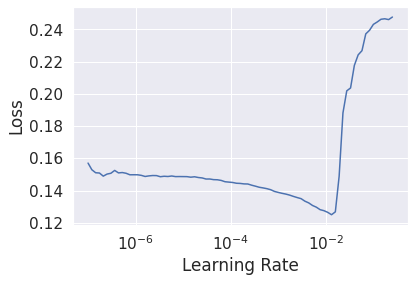

In [60]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [61]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.142942,1.035592,0.267348,0.041159,0.922006,0.078800,0.753555,00:00
1,0.144790,1.092945,0.271703,0.041510,0.924791,0.079454,0.751048,00:00
2,0.132762,1.158862,0.261384,0.041065,0.927577,0.078649,0.750608,00:00
3,0.120605,1.149240,0.271608,0.041620,0.927577,0.079665,0.755849,00:00


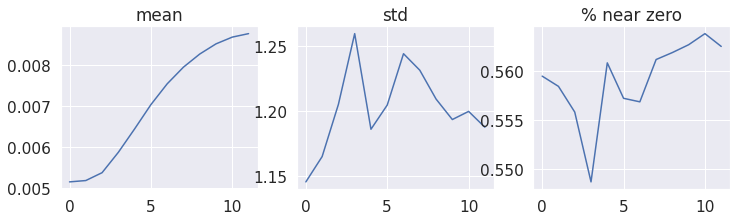

In [62]:
learn.activation_stats.plot_layer_stats(-2)

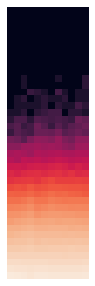

In [63]:
learn.activation_stats.color_dim(-2)

In [64]:
interp = ClassificationInterpretation.from_learner(learn)

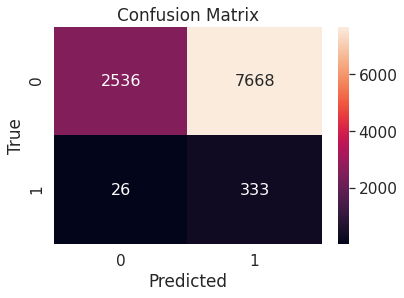

In [65]:
fig = plot_confusion_matrix(interp);
fig.savefig(path.BASE_PATH/'../figures/RUS_NN_cm.jpg', dpi=1000, bbox_inches='tight')

In [66]:
valid['isFraud'].sum()

359

## RandomUnderSampler with V*** features

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [164]:
rus = RandomUnderSampler(random_state=42)

In [165]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [166]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [167]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [168]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((3274, 434), (3274,))

In [169]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(13837, 434)

In [170]:
df_nn.reset_index(drop=True)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,...,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3406705,10620434,20.95,W,10057,225.0,150.0,mastercard,224.0,debit,327.0,87.0,8.0,NaN,yahoo.com,NaN,9.0,7.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,0.0,16.0,9.0,43.0,43.0,43.0,256.0,28.0,NaN,NaN,NaN,NaN,123.0,256.0,NaN,NaN,NaN,256.0,T,T,T,NaN,NaN,F,F,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,25.950001,25.950001,25.950001,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3102666,2237550,85.00,W,12570,462.0,150.0,visa,226.0,debit,191.0,87.0,194.0,NaN,yahoo.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,16.0,1.0,47.0,47.0,0.0,47.0,0.0,NaN,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,47.0,T,T,T,M0,F,T,F,F,F,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17.0,0.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,35.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,97.0,2964.500000,1140.000000,0.0,726.000000,0.0,272.000000,0.000000,344.000000,0.000000,97.0,2238.5,868.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [171]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [172]:
cut_off = 12666124

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [173]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [174]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [175]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3274, 800), (10563, 800))

In [176]:
dls = to_nn.dataloaders(1024)

In [177]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [182]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.025118863582611083, 0.0020892962347716093)

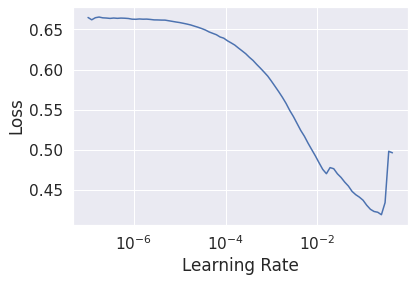

In [183]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [184]:
learn.fit_one_cycle(4, lr_steep, wd=0.1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.634389,0.779128,0.850516,0.115385,0.509749,0.188175,0.800544,00:02
1,0.566045,0.907029,0.823251,0.110537,0.596100,0.186492,0.802601,00:02
2,0.511273,0.966441,0.836978,0.120757,0.604457,0.201299,0.804624,00:02
3,0.463286,0.989194,0.853261,0.127580,0.568245,0.208376,0.806363,00:02


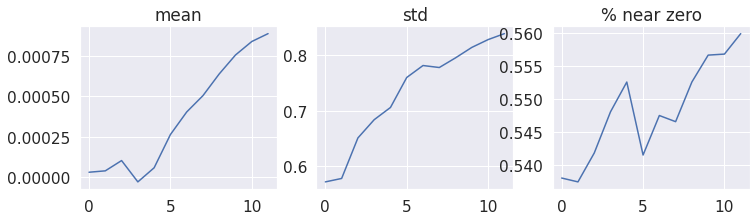

In [185]:
learn.activation_stats.plot_layer_stats(-2)

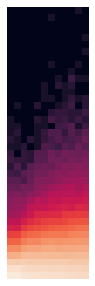

In [186]:
learn.activation_stats.color_dim(-2)

In [187]:
interp = ClassificationInterpretation.from_learner(learn)

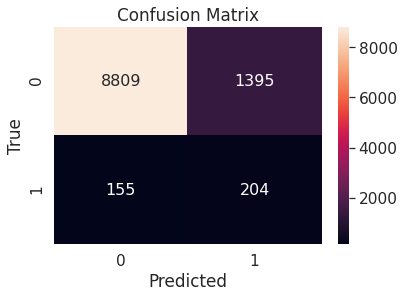

In [189]:
plot_confusion_matrix(interp);

## RandomOverSampler without V*** features

In [68]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
ros = RandomOverSampler(random_state=42)

In [70]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [71]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [72]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_ss))

In [73]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93708, 95), (93708,))

In [74]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(104271, 95)

In [75]:
df_nn.reset_index(drop=True);

In [76]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [77]:
cut_off = 12666124

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [78]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [79]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [80]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93708, 122), (10563, 122))

In [81]:
dls = to_nn.dataloaders(1024)

In [82]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [83]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(3.311311274956097e-07, 6.309573450380412e-07)

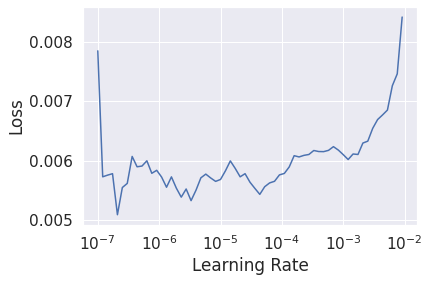

In [88]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [85]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.247517,0.354488,0.852788,0.124843,0.554318,0.203789,0.783863,00:08
1,0.097872,0.255033,0.960144,0.366379,0.236769,0.287648,0.806119,00:08
2,0.034176,0.300386,0.957588,0.343860,0.272981,0.304348,0.792984,00:08
3,0.011817,0.308496,0.956452,0.324042,0.259053,0.287926,0.801543,00:08


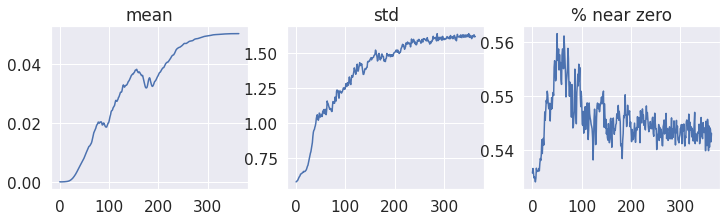

In [86]:
learn.activation_stats.plot_layer_stats(-2)

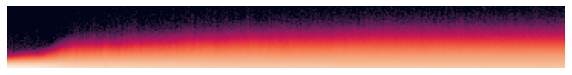

In [87]:
learn.activation_stats.color_dim(-2)

In [212]:
interp = ClassificationInterpretation.from_learner(learn)

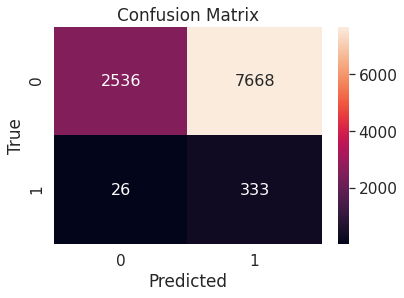

In [89]:
fig = plot_confusion_matrix(interp);
fig.savefig(path.BASE_PATH/'../figures/ROS_NN_cm.jpg', dpi=1000, bbox_inches='tight')

## RandomOverSampler with V*** features

In [215]:
from imblearn.over_sampling import RandomOverSampler

In [216]:
ros = RandomOverSampler(random_state=42)

In [217]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [222]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [223]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [224]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93708, 434), (93708,))

In [225]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(104271, 434)

In [226]:
df_nn.reset_index(drop=True)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,...,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3067660,1731739,150.00,R,2114,396.0,150.0,mastercard,224.0,debit,315.0,87.0,NaN,NaN,yahoo.com,sbcglobal.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,115.041664,0.041666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,75759.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,-360.0,Found,Found,166.0,NaN,312.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,ie 11.0 for desktop,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0,0
1,3334704,8559796,47.95,W,10112,360.0,150.0,visa,166.0,debit,264.0,87.0,2.0,NaN,NaN,NaN,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,T,T,T,NaN,NaN,F,F,T,T,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [227]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [228]:
cut_off = 12666124

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12666124

In [229]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [230]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [231]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93708, 800), (10563, 800))

In [232]:
dls = to_nn.dataloaders(1024)

In [233]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [238]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.00831763744354248, 0.0020892962347716093)

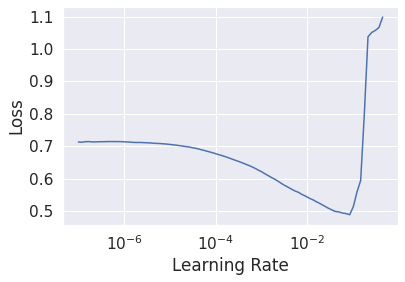

In [239]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [240]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.256254,0.280012,0.886680,0.160454,0.551532,0.248588,0.812715,00:31
1,0.105120,0.238544,0.937234,0.238832,0.387187,0.295430,0.773218,00:31
2,0.037557,0.275372,0.954180,0.334218,0.350975,0.342391,0.803869,00:31
3,0.012862,0.266900,0.957967,0.376093,0.359331,0.367521,0.794675,00:30


In [241]:
interp = ClassificationInterpretation.from_learner(learn)

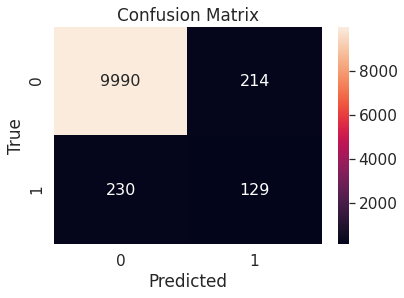

In [243]:
plot_confusion_matrix(interp);

## Class weighting NN without V*** features

In [90]:
df = pd.read_csv(path/'train_ss.csv', index_col=[0])

In [91]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [92]:
#to_nn = (path/'to_nn.pkl').load()

AttributeError: 'PosixPath' object has no attribute 'load'

In [93]:
with open (path/'to_nn.pkl', 'rb') as f:
    to_nn = pickle.load(f) 

In [94]:
to_nn.valid.y.sum()

359

In [95]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[200, 100], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.0002511886414140463, 1.0964781722577754e-06)

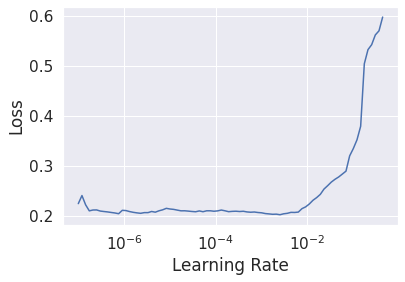

In [98]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [97]:
learn.fit_one_cycle(4, lr_steep , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.536665,0.599669,0.871343,0.125749,0.467967,0.198230,0.793054,00:02
1,0.431950,0.592746,0.752248,0.087052,0.662953,0.153896,0.797547,00:02
2,0.333902,0.785203,0.794093,0.100704,0.637883,0.173946,0.783381,00:02
3,0.263555,0.876620,0.850327,0.128797,0.590529,0.211471,0.785305,00:02


In [99]:
interp = ClassificationInterpretation.from_learner(learn)

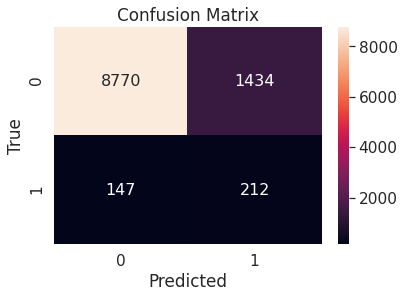

In [100]:
fig = plot_confusion_matrix(interp);
fig.savefig(path.BASE_PATH/'../figures/CW_NN_cm.jpg', dpi=1000, bbox_inches='tight')

## Class weighting NN with V*** features 

In [286]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [287]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [288]:
to_nn = (path/'to_nn_full.pkl').load()

In [289]:
to_nn.valid.y.sum()

359

In [295]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[200, 100], loss_func=loss_func, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.005754399299621582, 0.001737800776027143)

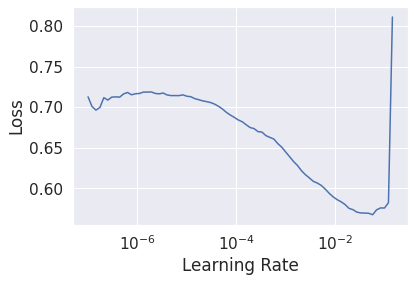

In [296]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [297]:
learn.fit_one_cycle(4, lr_steep , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.507480,0.856062,0.837925,0.126036,0.635097,0.210332,0.814958,00:17
1,0.405085,0.673548,0.861214,0.140818,0.604457,0.228421,0.818838,00:16
2,0.319806,0.634914,0.825144,0.114108,0.612813,0.192392,0.797312,00:17
3,0.250878,0.678607,0.865569,0.145151,0.604457,0.234088,0.812143,00:16


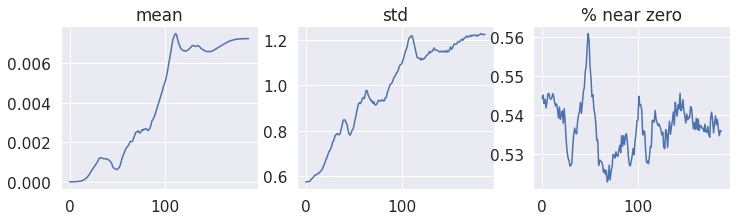

In [298]:
learn.activation_stats.plot_layer_stats(-2)

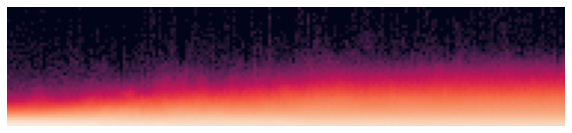

In [299]:
learn.activation_stats.color_dim(-2)

In [300]:
interp = ClassificationInterpretation.from_learner(learn)

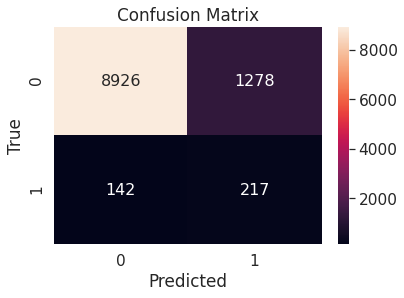

In [302]:
plot_confusion_matrix(interp);